In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Load CIFAR-10 dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Normalize pixel values to range [0, 1]

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Define the convolutional neural network (CNN) model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))





Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3420 - loss: 1.7799 - val_accuracy: 0.5066 - val_loss: 1.3888
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5568 - loss: 1.2509 - val_accuracy: 0.5794 - val_loss: 1.1825
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6219 - loss: 1.0658 - val_accuracy: 0.6159 - val_loss: 1.0811
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6616 - loss: 0.9692 - val_accuracy: 0.6467 - val_loss: 1.0146
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6951 - loss: 0.8711 - val_accuracy: 0.6629 - val_loss: 0.9627
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7170 - loss: 0.8127 - val_accuracy: 0.6734 - val_loss: 0.9451
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7338 - loss: 0.7596 - val_accuracy: 0.6947 - val_loss: 0.8856
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7494 -

Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Plot training/validation accuracy and loss

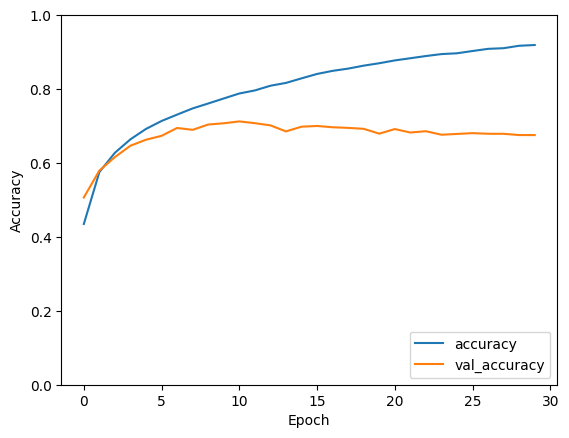

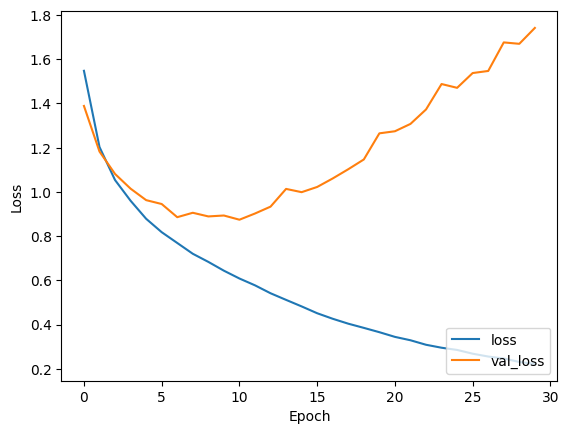

In [5]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()


Here, we import the necessary libraries:

tensorflow: TensorFlow is an open-source machine learning framework developed by Google for building and training machine learning models.
datasets: TensorFlow's datasets module provides utilities for loading common datasets.
layers: This module contains various layers, such as convolutional, pooling, and dense layers, which are building blocks for constructing neural network architectures.
models: The models module contains tools for creating and training neural network models.
matplotlib.pyplot: Matplotlib is a plotting library for Python. We import the pyplot module to visualize the training and validation metrics.


This line loads the CIFAR-10 dataset from TensorFlow's built-in datasets. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class.

Here, we normalize the pixel values of the images to be in the range [0, 1] by dividing by 255. This standardizes the input data, which often leads to faster convergence during training.